In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'D:\\chest_xray\\train'
valid_path = 'D:\\chest_xray\\test'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('D:\\chest_xray\\train/*')

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('D:\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('D:\\chest_xray\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 624 images belonging to 2 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
163/163 [==============================] - 168s 1s/step - loss: 0.8297 - accuracy: 0.9039 - val_loss: 1.1115 - val_accuracy: 0.8894
Epoch 2/80
163/163 [==============================] - 123s 753ms/step - loss: 0.4614 - accuracy: 0.9352 - val_loss: 1.3389 - val_accuracy: 0.8638
Epoch 3/80
163/163 [==============================] - 123s 755ms/step - loss: 0.5018 - accuracy: 0.9367 - val_loss: 4.5453 - val_accuracy: 0.7500
Epoch 4/80
163/163 [==============================] - 122s 750ms/step - loss: 0.5398 - accuracy: 0.9454 - val_loss: 1.4316 - val_accuracy: 0.8654
Epoch 5/80
163/163 [==============================] - 122s 751ms/step - loss: 0.8547 - accuracy: 0.9323 - val_loss: 2.8452 - val_accuracy: 0.8606
Epoch 6/80
163/163 [==============================] - 123s 753ms/step - loss: 0.6339 - accuracy: 0.9477 - val_loss: 3.3231 - val_accuracy: 0.8317
Epoch 7/80
163/163 [==============================] - 122s 750ms/step - loss: 0.4763 - accuracy: 0.9572 - val_loss: 4.0656 - va

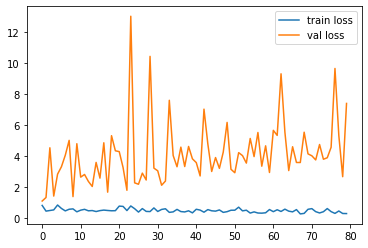

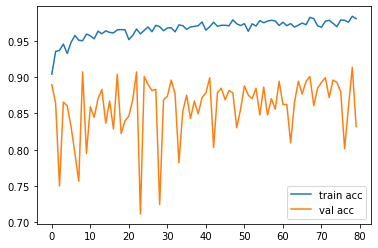

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')